# *DATA CLEANING*

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

![](data_cleaning.jpeg)

# **Step 1**:   Read the dataframe

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'./Input/attacks.csv', encoding='cp1252')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


**Title of each column and how many there are of them**

In [3]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [4]:
len(df.columns)

24

**Rename columns with spaces after the title (within the string)**

In [5]:
df2 = df.rename(columns={'Species ': 'Species', 'Sex ': 'Sex' })

#  **Step 2**:   Get rid of completely empty columns 

**Number of empty cells held in each column**

In [6]:
df2.isnull().sum().sort_values().tail()

Age            22252
Species        22259
Time           22775
Unnamed: 23    25721
Unnamed: 22    25722
dtype: int64

**Columns with nearly all values missing are removed from the table**

In [7]:
valid_columns = df2.isnull().sum().sort_values(ascending=False) < 25000
valid_columns.head(10)

Unnamed: 22    False
Unnamed: 23    False
Time            True
Species         True
Age             True
Sex             True
Activity        True
Location        True
Fatal (Y/N)     True
Area            True
dtype: bool

**Valid columns added only if isValid -> True**

In [8]:
valid_columns = [coluName for coluName,isValid in valid_columns.items() if isValid]

# - **Step 3**:   Create a new df that is clean 

**Clean df made with valid_columns with no specific order**

In [9]:
df_clean=df2[valid_columns]
df_clean.head()

,Time,Species,Age,Sex,Activity,Location,Fatal (Y/N),Area,Name,Country,...,Type,Year,href formula,pdf,href,Case Number.1,Case Number.2,Date,original order,Case Number
0,18h00,White shark,57,F,Paddling,"Oceanside, San Diego County",N,California,Julie Wolfe,USA,...,Boating,2018.0,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,25-Jun-2018,6303.0,2018.06.25
1,14h00 -15h00,NaN,11,F,Standing,"St. Simon Island, Glynn County",N,Georgia,Adyson McNeely,USA,...,Unprovoked,2018.0,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,18-Jun-2018,6302.0,2018.06.18
2,07h45,NaN,48,M,Surfing,"Habush, Oahu",N,Hawaii,John Denges,USA,...,Invalid,2018.0,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,09-Jun-2018,6301.0,2018.06.09
3,NaN,2 m shark,NaN,M,Surfing,Arrawarra Headland,N,New South Wales,male,AUSTRALIA,...,Unprovoked,2018.0,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,08-Jun-2018,6300.0,2018.06.08
4,NaN,"Tiger shark, 3m",NaN,M,Free diving,La Ticla,N,Colima,Gustavo Ramos,MEXICO,...,Provoked,2018.0,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,04-Jun-2018,6299.0,2018.06.04


# - **Step 4**:   Change NaN values for 'unknown' in "Species"

**Replace NaN 'Species' values with: unknown species**

In [10]:
df_clean['Species'] = df_clean.Species.fillna("unknown species")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Count the number of rows with unkown species in 'Species'**

In [11]:
df_clean["Species"].value_counts().head()

unknown species                                       22259
White shark                                             163
Shark involvement prior to death was not confirmed      105
Invalid                                                 102
Shark involvement not confirmed                          88
Name: Species, dtype: int64

# - **Step 5**:   Remove rows with 'unknown species' in "Species" 

**Remove all rows with unknown species and create a new table**
**New df with known shark species only**

In [12]:
df_species = df_clean[df_clean["Species"]!='unknown species']
len(df_species)

3464

# - **Step 6**:  Clear the "Date" column  

**Make a list out of all years and months in the column 'Years'**

In [13]:
date_list = list(df_species["Date"])

In [14]:
date_correction={}

In [15]:
date_correction["Updated_Date"]=[]

for e in date_list:
    res = re.findall(r"[A-Z]{1}\w{2}[-\s]?\d{4}", e)
    if res:
        date_correction["Updated_Date"].append(res[0])
    else:
        date_correction["Updated_Date"].append('')
        
        
date_correction["Updated_Date"]

['Jun-2018',
 'Jun-2018',
 'Jun-2018',
 'Jun-2018',
 'May-2018',
 'May-2018',
 'May-2018',
 'May-2018',
 'May 2018',
 'May-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Mar-2018',
 'Mar-2018',
 'Mar-2018',
 'Mar-2018',
 'Feb-2018',
 'Feb-2018',
 'Feb-2018',
 'Feb-2018',
 'Feb-2018',
 'Feb-2018',
 'Feb-2018',
 'Jan-2018',
 'Jan-2018',
 'Jan-2018',
 'Jan-2018',
 'Jan-2018',
 'Jan-2018',
 'Dec-2017',
 'Dec-2017',
 'Dec-2017',
 'Nov-2017',
 'Nov-2017',
 'Nov-2017',
 'Nov-2017',
 'Nov-2017',
 'Nov-2017',
 'Oct-2017',
 'Oct-2017',
 'Oct-2017',
 'Oct-2017',
 'Oct-2017',
 'Oct-2017',
 'Oct-2017',
 'Oct-2017',
 'Sep-2017',
 'Sep-2017',
 'Sep-2017',
 'Sep-2017',
 'Sep-2017',
 'Sep-2017',
 'Sep-2017',
 'Sep-2017',
 'Sep-2017',
 'Aug-2017',
 'Aug-2017',
 'Aug-2017',
 'Aug-2017',
 'Aug-2017',
 'Aug-2017',
 'Aug-2017',
 'Aug-2017',
 'Jul-2017',
 'Jul-2017',
 'Jul-2017',

**Create a new df with corrected years**

In [16]:
df_year = pd.DataFrame(date_correction)
df_year.head()

,Updated_Date
0,Jun-2018
1,Jun-2018
2,Jun-2018
3,Jun-2018
4,May-2018


**Join the new df with the species one**

In [17]:
df_concat = pd.concat([df_species,df_year], axis=1)

# - **Step 7**:   Dissect white sharks attack by year

**New df with White sharks only**

In [18]:
df_white_sharks = df_concat[(df_concat["Species"]== "White shark")]

In [19]:
%matplotlib inline

**Delete rows with NaN, new df with clean columns of interest only**

In [20]:
df_clean_ws = df_white_sharks[["Species","Updated_Date","Sex"]].dropna()
df_clean_ws

,Species,Updated_Date,Sex
0,White shark,Jun-2018,F
34,White shark,Jan-2018,M
120,White shark,Dec-2016,M
155,White shark,Jun-2016,F
169,White shark,Apr-2016,M
...,...,...,...
3371,White shark,Aug-1872,M
3410,White shark,,M
3411,White shark,,M
3447,White shark,,M


**Order df by date**

In [21]:
df_sorted = df_clean_ws.sort_values('Updated_Date')
df_sorted.head(10)

,Species,Updated_Date,Sex
3448,White shark,,M
2728,White shark,,M
3447,White shark,,M
3128,White shark,,M
3410,White shark,,M
3411,White shark,,M
2268,White shark,,M
2214,White shark,Apr-1970,M
1515,White shark,Apr-1996,M
1286,White shark,Apr-2001,M


**Replace empty fields with NaN so they can be dropped**

In [22]:
df_sorted['Updated_Date'].replace('', np.nan, inplace=True)

df_sortclean = df_sorted.dropna()
df_sortclean

,Species,Updated_Date,Sex
2214,White shark,Apr-1970,M
1515,White shark,Apr-1996,M
1286,White shark,Apr-2001,M
1096,White shark,Apr-2004,M
797,White shark,Apr-2008,F
...,...,...,...
997,White shark,Sep-2005,M
996,White shark,Sep-2005,M
918,White shark,Sep-2006,M
847,White shark,Sep-2007,M


**Changing months to ints in order to sort them correctly and not alfabetically**

In [25]:
date_correction = {"Jan":1,"Feb":2, "Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}

In [27]:
df_sortclean["Month"]= df_sortclean["Updated_Date"].apply(lambda i: date_correction.get(i[:3]))



/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_sortclean

,Species,Updated_Date,Sex,Month
2214,White shark,Apr-1970,M,4
1515,White shark,Apr-1996,M,4
1286,White shark,Apr-2001,M,4
1096,White shark,Apr-2004,M,4
797,White shark,Apr-2008,F,4
...,...,...,...,...
997,White shark,Sep-2005,M,9
996,White shark,Sep-2005,M,9
918,White shark,Sep-2006,M,9
847,White shark,Sep-2007,M,9


# *DATA WRANGLING*

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

## **Hypothesis: White sharks have killed  more men than women in the last 5 decades**

**Display attacks by month and count victims**

In [50]:
white_att = df_sortclean.groupby("Month").agg({"Sex":"count",})

display(white_att)

,Sex
Month,
1,10
2,7
3,2
4,7
5,7
6,11
7,11
8,7
9,13


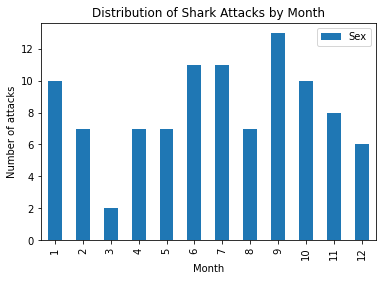

In [51]:
white_att.plot.bar()
plt.title("Distribution of Shark Attacks by Month")
plt.ylabel("Number of attacks");

**Display attacks by month and differentiate by victim's sex**

In [56]:
dfMales = df_sortclean[df_sortclean['Sex']=='M']
dfFemales = df_sortclean[df_sortclean['Sex']=='F']

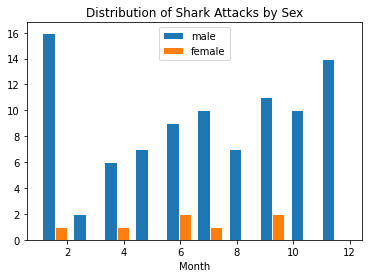

In [63]:
plt.hist([dfMales['Month'], dfFemales['Month']], edgecolor='white', label=['male', 'female'])
plt.xlabel("Month")
plt.title("Distribution of Shark Attacks by Sex")
plt.legend();

## **Conclusion:** 
as we can see from the graphs men are clearly more often found to be victims of a white shark attack than women. It is also interesting to notice that September has been the most dangerous month for as long as data exists.